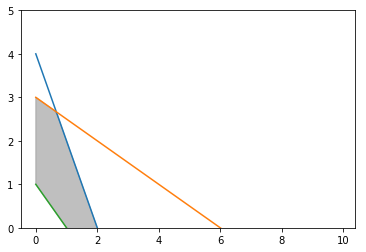

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,10,0.1)

# The lines to plot
y1 = 4 - 2*x
y2 = 3 - 0.5*x
y3 = 1 -x

# The upper edge of polygon (min of lines y1 & y2)
y4 = np.minimum(y1, y2)

# Set y-limit, making neg y-values not show in plot
plt.ylim(0, 5)

# Plotting of lines
plt.plot(x, y1,
         x, y2,
         x, y3)

# Filling between line y3 and line y4
plt.fill_between(x, y3, y4, color='grey', alpha='0.5')
plt.show()

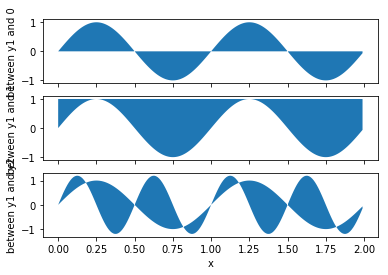

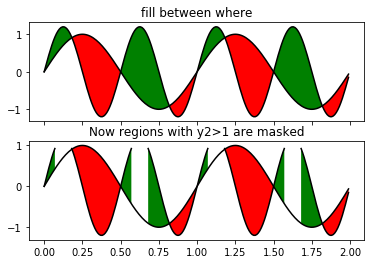

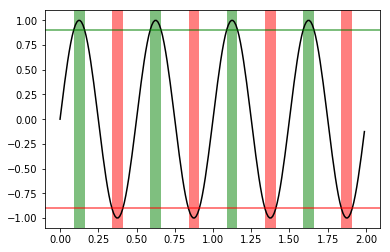

In [3]:
# import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.fill_between(x, 0, y1)
ax1.set_ylabel('between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_ylabel('between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_ylabel('between y1 and y2')
ax3.set_xlabel('x')

# now fill between y1 and y2 where a logical condition is met.  Note
# this is different than calling
#   fill_between(x[where], y1[where],y2[where]
# because of edge effects over multiple contiguous regions.
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax.set_title('fill between where')

# Test support for masked arrays.
y2 = np.ma.masked_greater(y2, 1.0)
ax1.plot(x, y1, x, y2, color='black')
ax1.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
ax1.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax1.set_title('Now regions with y2>1 are masked')

# This example illustrates a problem; because of the data
# gridding, there are undesired unfilled triangles at the crossover
# points.  A brute-force solution would be to interpolate all
# arrays to a very fine grid before plotting.

# show how to use transforms to create axes spans where a certain condition is satisfied
fig, ax = plt.subplots()
y = np.sin(4*np.pi*x)
ax.plot(x, y, color='black')

# use the data coordinates for the x-axis and the axes coordinates for the y-axis
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.9
ax.axhline(theta, color='green', lw=2, alpha=0.5)
ax.axhline(-theta, color='red', lw=2, alpha=0.5)
ax.fill_between(x, 0, 1, where=y > theta, facecolor='green', alpha=0.5, transform=trans)
ax.fill_between(x, 0, 1, where=y < -theta, facecolor='red', alpha=0.5, transform=trans)


plt.show()

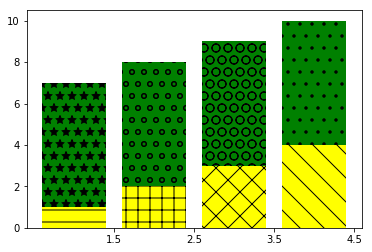

In [8]:
"""
Hatching (pattern filled polygons) is supported currently in the PS,
PDF, SVG and Agg backends only.
"""
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

fig = plt.figure()
# ax1 = fig.add_subplot(131)
# ax1.bar(range(1, 5), range(1, 5), color='red', edgecolor='black', hatch="/")
# ax1.bar(range(1, 5), [6] * 4, bottom=range(1, 5), color='blue', edgecolor='black', hatch='//')
# ax1.set_xticks([1.5, 2.5, 3.5, 4.5])

ax2 = fig.add_subplot(111)
bars = ax2.bar(range(1, 5), range(1, 5), color='yellow', ecolor='black') + \
    ax2.bar(range(1, 5), [6] * 4, bottom=range(1, 5), color='green', ecolor='black')
ax2.set_xticks([1.5, 2.5, 3.5, 4.5])

patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.')
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

# ax3 = fig.add_subplot(133)
# ax3.fill([1, 3, 3, 1], [1, 1, 2, 2], fill=False, hatch='\\')
# ax3.add_patch(Ellipse((4, 1.5), 4, 0.5, fill=False, hatch='*'))
# ax3.add_patch(Polygon([[0, 0], [4, 1.1], [6, 2.5], [2, 1.4]], closed=True,
#                       fill=False, hatch='/'))
# ax3.set_xlim((0, 6))
# ax3.set_ylim((0, 2.5))

plt.show()

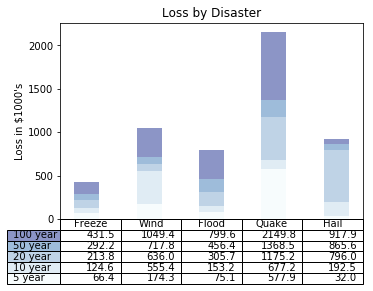

In [9]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()